A simple exploration notebook to get some insights about the data.

**Please check the output tab for animation**

**Objective:**

In this competition, The Nature Conservancy asks you to help them detect which species of fish appears on a fishing boat, based on images captured from boat cameras of various angles.  

Your goal is to predict the likelihood of fish species in each picture.

As mentioned in the data page, there are eight target categories available in the dataset.

 1. Albacore tuna
 2. Bigeye tuna
 3. Yellowfin tuna
 4. Mahi Mahi
 5. Opah
 6. Sharks
 7. Other (meaning that there are fish present but not in the above categories)
 8. No Fish (meaning that no fish is in the picture)

**Important points to note:**

 1. Pre-trained models and external data are allowed in the competition, but need to be posted on this [official forum thread][1]
 2. The competition comprises of two stages. Test data for second stage will be released in the last week.   

First let us see the number of image files present for each of the species


  [1]: https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring/forums/t/25428/official-pre-trained-model-and-data-thread/144487#post144487

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.misc import imread
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import PIL
from subprocess import check_output
%matplotlib inline
print('ok')

ok


In [3]:
os.chdir('/Users/HUGO/Documents/Kaggle/FISH/train/')
print(check_output(["ls", "../train/"]).decode("utf8"))

ALB
BET
DOL
LAG
NoF
OTHER
SHARK
YFT



Number of files for the species ALB : 1719
Number of files for the species BET : 200
Number of files for the species DOL : 117
Number of files for the species LAG : 67
Number of files for the species NoF : 465
Number of files for the species OTHER : 299
Number of files for the species SHARK : 176
Number of files for the species YFT : 734


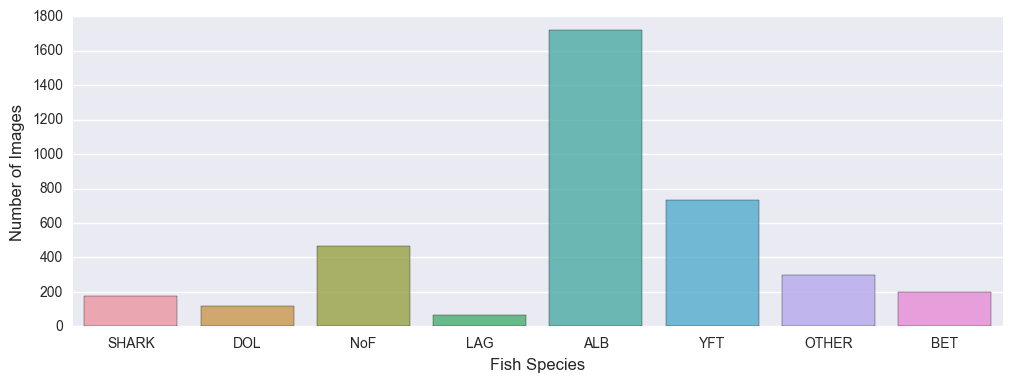

In [4]:
sub_folders = check_output(["ls", "../train/"]).decode("utf8").strip().split('\n')
count_dict = {}
for sub_folder in sub_folders:
    num_of_files = len(check_output(["ls", "../train/"+sub_folder]).decode("utf8").strip().split('\n'))
    print("Number of files for the species",sub_folder,":",num_of_files)
    count_dict[sub_folder] = num_of_files
    
plt.figure(figsize=(12,4))
sns.barplot(list(count_dict.keys()), list(count_dict.values()), alpha=0.8)
plt.xlabel('Fish Species', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.show()
    
    

## JE MAPPELLE JORDAN SECHIER BO GOSS =D

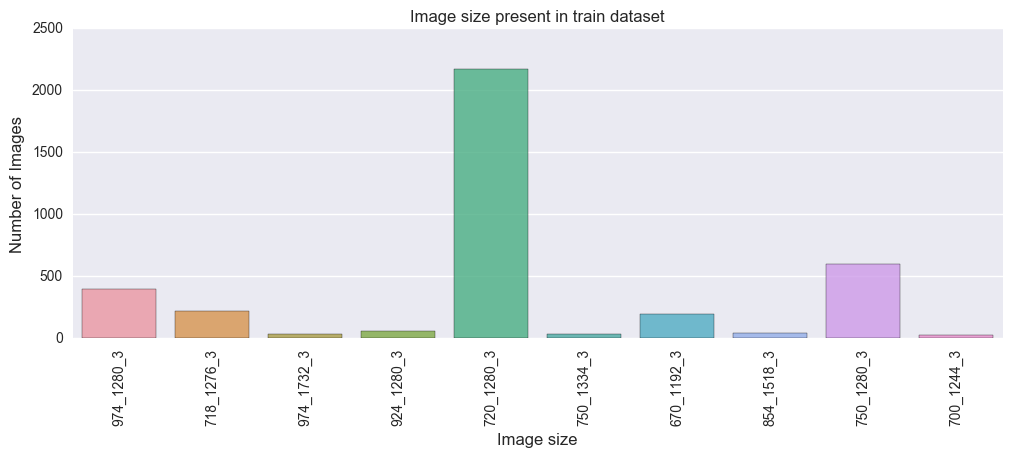

In [5]:
train_path = "../train/"
sub_folders = check_output(["ls", train_path]).decode("utf8").strip().split('\n')
different_file_sizes = {}
for sub_folder in sub_folders:
    file_names = check_output(["ls", train_path+sub_folder]).decode("utf8").strip().split('\n')
    for file_name in file_names:
        im_array = imread(train_path+sub_folder+"/"+file_name)
        size = "_".join(map(str,list(im_array.shape)))
        different_file_sizes[size] = different_file_sizes.get(size,0) + 1

plt.figure(figsize=(12,4))
sns.barplot(list(different_file_sizes.keys()), list(different_file_sizes.values()), alpha=0.8)
plt.xlabel('Image size', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title("Image size present in train dataset")
plt.xticks(rotation='vertical')
plt.show()

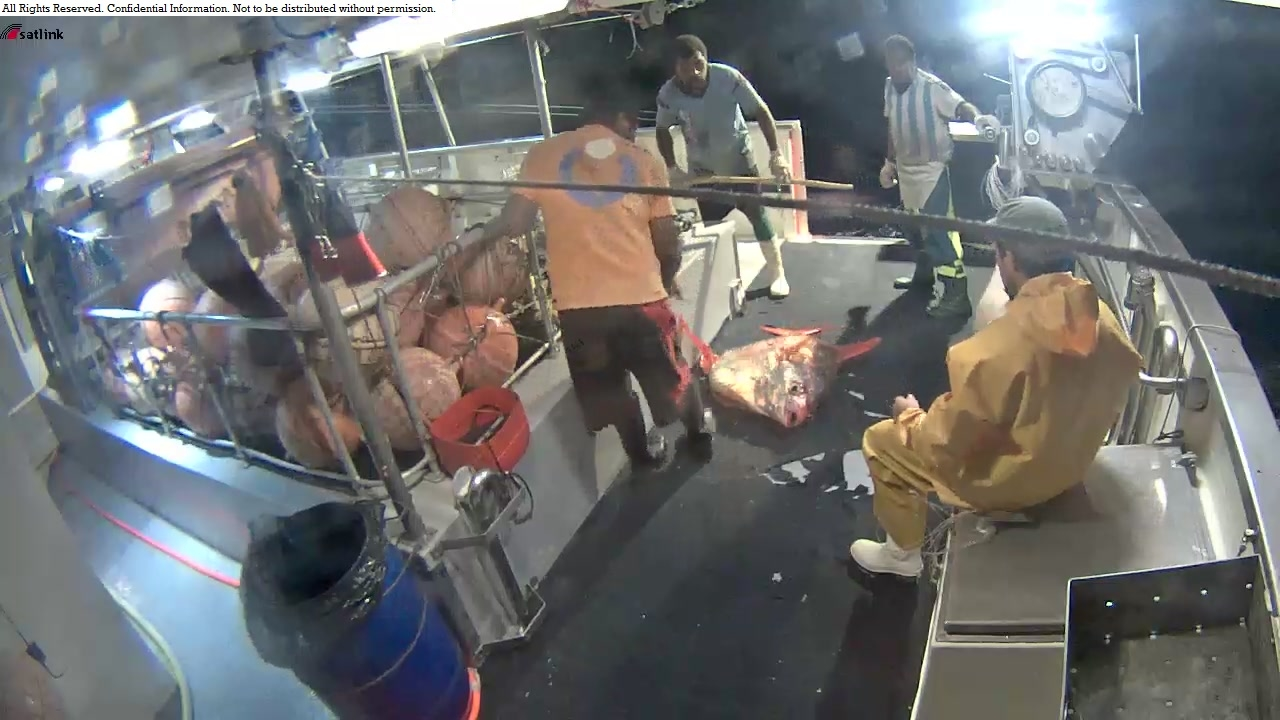

In [25]:
os.chdir('/Users/HUGO/Documents/Kaggle/FISH/train/LAG/')
display(Image(filename="img_00176.jpg"))

In [36]:
pixel_depth=255.00
image_size_height = 1280  # Pixel height.
image_size_width = 720  # Pixel width 
os.chdir('/Users/HUGO/Documents/Kaggle/FISH/train/ALB/')
image_file="img_00029.jpg" #img_05966, img_00784
image_data = (ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth

ImportError: Could not import the Python Imaging Library (PIL) required to load image files.  Please refer to http://pillow.readthedocs.org/en/latest/installation.html for installation instructions.

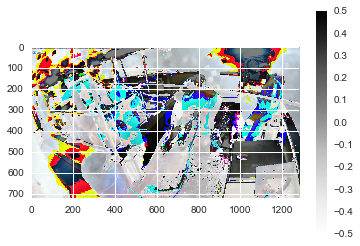

In [22]:
plt.figure()
plt.imshow(image_data)  # display it
plt.colorbar()